In [1]:
import requests
import json
import datetime
import pandas as pd
import os

In [2]:
df = pd.read_csv("final_engineered_features.csv")
df.info()

/Users/yuconglei/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314488 entries, 0 to 314487
Data columns (total 24 columns):
FEI Number                    314488 non-null int64
Legal Name                    314488 non-null object
City                          314487 non-null object
State                         314488 non-null object
Zip                           314488 non-null object
Country/Area                  314488 non-null object
Fiscal Year                   314488 non-null int64
Inspection ID                 314488 non-null int64
Posted Citations              314488 non-null object
Inspection End Date           314488 non-null object
Classification                314488 non-null object
Project Area                  314488 non-null object
Product Type                  314488 non-null object
Additional Details            314488 non-null object
FMD-145 Date                  314488 non-null object
recalled_bool                 314488 non-null int64
classification_flag           314488 non-null

In [3]:
df.head()

,FEI Number,Legal Name,City,State,Zip,Country/Area,Fiscal Year,Inspection ID,Posted Citations,Inspection End Date,...,FMD-145 Date,recalled_bool,classification_flag,inspection_year,inspection_month,inspection_dayofweek,inspection_quarter,week_of_year,inspection_season,days_since_last_inspection
0,319,Wei Chuan Taichung Factory,Taichung,-,-,Taiwan,2010,618345,Yes,2009-10-05,...,-,0,1,2009,10,0,4,41,Fall,-1.0
1,360,DSP,Chauny,-,-,France,2012,776513,No,2012-03-22,...,2012-10-15 00:00:00,0,1,2012,3,3,1,12,Spring,-1.0
2,360,DSP,Chauny,-,-,France,2015,945254,No,2015-09-18,...,2016-01-04 00:00:00,0,0,2015,9,4,3,38,Fall,1275.0
3,360,DSP,Chauny,-,-,France,2019,1123946,No,2019-06-27,...,2020-06-09 00:00:00,0,1,2019,6,3,2,26,Summer,1378.0
4,360,DSP,Chauny,-,-,France,2022,1269324,No,2022-06-03,...,-,0,1,2022,6,4,2,22,Summer,1072.0


In [4]:
df['Inspection End Date'] = pd.to_datetime(df['Inspection End Date'])

In [5]:
df = df[df['Product Type'] == 'Food/Cosmetics']
df.head()

,FEI Number,Legal Name,City,State,Zip,Country/Area,Fiscal Year,Inspection ID,Posted Citations,Inspection End Date,...,FMD-145 Date,recalled_bool,classification_flag,inspection_year,inspection_month,inspection_dayofweek,inspection_quarter,week_of_year,inspection_season,days_since_last_inspection
0,319,Wei Chuan Taichung Factory,Taichung,-,-,Taiwan,2010,618345,Yes,2009-10-05,...,-,0,1,2009,10,0,4,41,Fall,-1.0
130,8044,Productos Frescamar S.A. De C.V.,Ensenada,-,-,Mexico,2009,626338,No,2009-08-03,...,-,0,0,2009,8,0,3,32,Summer,-1.0
131,8103,Tropical Food Industries Company Limited,Mueang Samut Sakhon,-,-,Thailand,2023,1206614,No,2023-05-17,...,2023-06-23 00:00:00,0,0,2023,5,2,2,20,Spring,-1.0
132,8103,Tropical Food Industries Company Limited,Mueang Samut Sakhon,-,-,Thailand,2023,1206614,No,2023-05-17,...,2023-06-23 00:00:00,0,0,2023,5,2,2,20,Spring,0.0
133,8140,"Modesto Carrodeguas, S.L.",Carino,-,-,Spain,2012,771563,Yes,2012-02-21,...,2012-07-31 00:00:00,0,1,2012,2,1,1,8,Winter,-1.0


In [6]:
df['Country/Area'].unique()

array(['Taiwan', 'Mexico', 'Thailand', 'Spain', 'Poland', 'Ecuador',
       'Japan', 'Indonesia', 'Greece', 'Sweden', 'Israel', 'France',
       'Italy', 'United Kingdom', 'Ireland', 'Canada', 'India',
       'Dominican Republic (the)', 'United States', 'Brazil', 'Chile',
       'Korea (the Republic of)', 'Switzerland', 'Germany', 'Singapore',
       'Argentina', 'Jamaica', 'Philippines', 'Malaysia', 'Belgium',
       'Hong Kong SAR', 'Honduras', 'Netherlands', 'Turkey', 'Peru',
       'China', 'Nicaragua', 'Trinidad & Tobago', 'Austria', 'Guatemala',
       'Fiji', 'Norway', 'Suriname', 'Bangladesh', 'Sri Lanka',
       'El Salvador', 'South Africa', 'Vietnam', 'Denmark', 'Australia',
       'Panama', 'Belize', 'Costa Rica', 'Morocco', 'Colombia', 'Nigeria',
       'Senegal', 'United Arab Emirates', 'Macedonia', 'Egypt', 'Romania',
       'Bahamas', 'Madagascar', 'Kenya', 'Bulgaria', 'Portugal', 'Ghana',
       'Finland', 'Malawi', 'Iceland', 'Czech Republic', 'Jordan',
       'Urugua

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [8]:
# Select features and label
df = df[['City', 'Inspection End Date', 'recalled_bool']].dropna()

# Encode 'City' with label encoding or frequency encoding
city_encoder = LabelEncoder()
df['City_encoded'] = city_encoder.fit_transform(df['City'])

# Convert 'Inspection End Date' to datetime and then numeric feature
df['Inspection End Date'] = pd.to_datetime(df['Inspection End Date'], errors='coerce')
df = df[df['Inspection End Date'] >= pd.Timestamp('2010-01-01')]
df = df.dropna(subset=['Inspection End Date'])
df['inspection_days_since_2000'] = (df['Inspection End Date'] - pd.Timestamp('2000-01-01')).dt.days

# Define features (X) and target (y)
X = df[['City_encoded', 'inspection_days_since_2000']]
y = df['recalled_bool'].astype(int)  # ensure y is int type

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit SVM model
model = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced')
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.57      0.70     29779
           1       0.09      0.48      0.15      2676

    accuracy                           0.56     32455
   macro avg       0.51      0.52      0.43     32455
weighted avg       0.86      0.56      0.66     32455



In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Recalled (0)', 'Recalled (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

<Figure size 640x480 with 2 Axes>

In [10]:
plt.show()

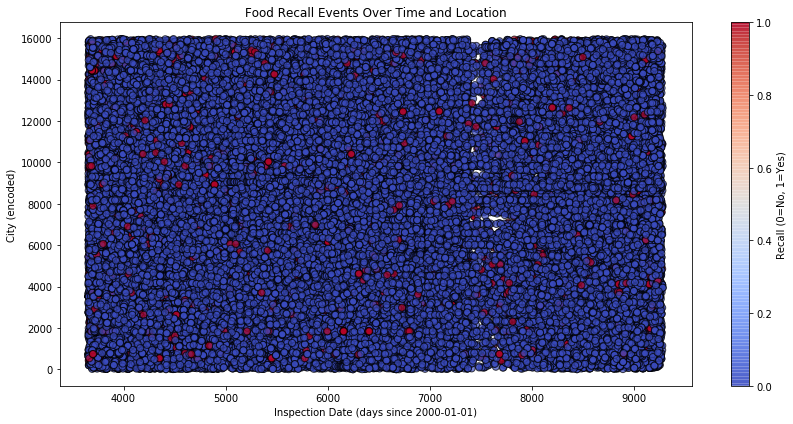

In [11]:
df_plot = df.copy()
# Scatter plot
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    df_plot['inspection_days_since_2000'],
    df_plot['City_encoded'],
    c=df_plot['recalled_bool'],
    cmap='coolwarm',
    alpha=0.7,
    edgecolors='k',
    s=50
)

plt.xlabel('Inspection Date (days since 2000-01-01)')
plt.ylabel('City (encoded)')
plt.title('Food Recall Events Over Time and Location')
plt.colorbar(scatter, label='Recall (0=No, 1=Yes)')
plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf'],
    'class_weight': ['balanced']
}

# Set up the grid search
grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    scoring='recall',  # Optimize for recall
    cv=5,
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Best Recall Score (CV average):", grid_search.best_score_)

# Evaluate on test set
y_pred = best_model.predict(X_test)
print("\nTest Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
✅ Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
✅ Best Recall Score (CV average): 0.5474658901592778

Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.52      0.66     29779
           1       0.09      0.53      0.15      2676

    accuracy                           0.52     32455
   macro avg       0.51      0.52      0.41     32455
weighted avg       0.86      0.52      0.62     32455



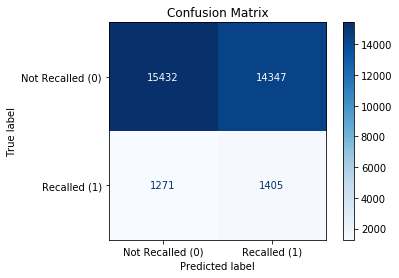

In [13]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Recalled (0)', 'Recalled (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()